In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
df =pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
linked = linkage(X_scaled, method='ward')

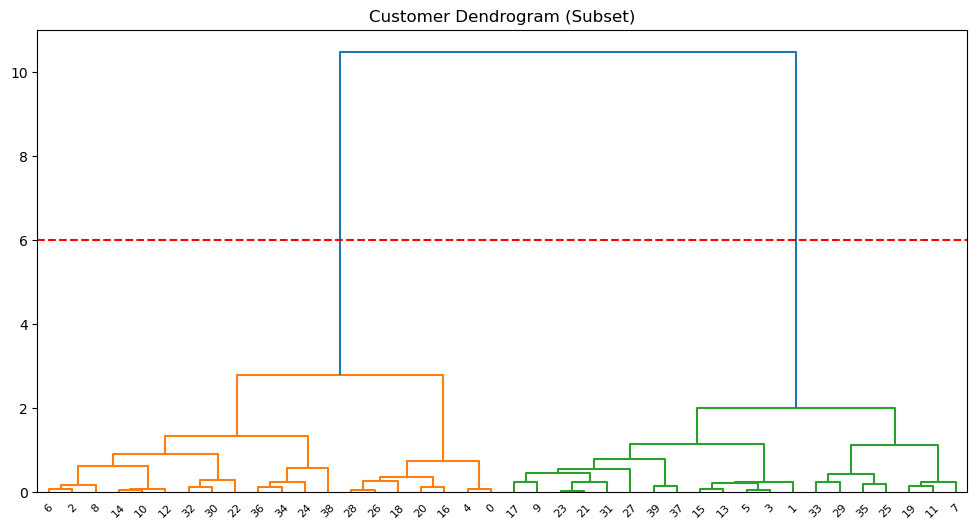

In [6]:
linked_small = linkage(X_scaled[:40], method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked_small, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Customer Dendrogram (Subset)')
plt.axhline(y=6, color='r', linestyle='--')

In [7]:
clusters = fcluster(linked, 3, criterion='maxclust')
df['Cluster'] = clusters

Text(0, 0.5, 'Spending Score (1-100)')

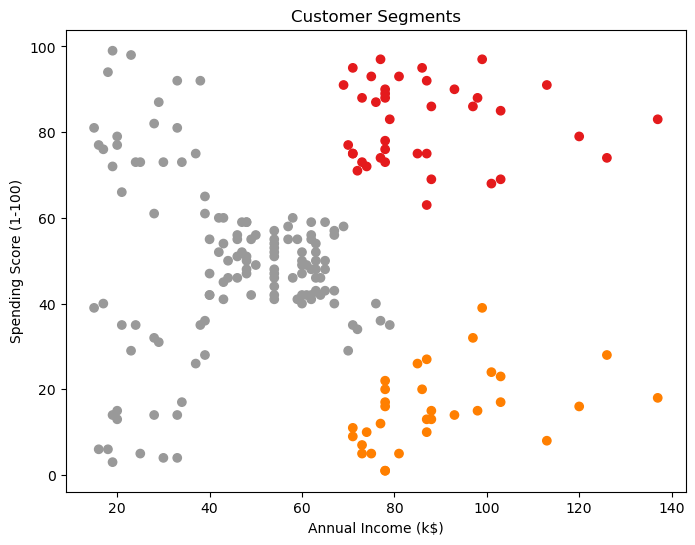

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='Set1')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')